
X starts at 100. Median ending value when win probability is 0.51 :   103.04579695773084
mean:  102.38145723751013
'risk of ruin', or probability that we end up with < 50:  0.0

X starts at 100. Median ending value when win probability is 0.55 :   116.19306726826764
mean:  163.29373229018685
'risk of ruin', or probability that we end up with < 50:  0.08

X starts at 100. Median ending value when win probability is 0.6 :   273.6762568640577
mean:  714.8130703794455
'risk of ruin', or probability that we end up with < 50:  0.105

X starts at 100. Median ending value when win probability is 0.75 :   119979.73438519979
mean:  5066121.838376589
'risk of ruin', or probability that we end up with < 50:  0.01


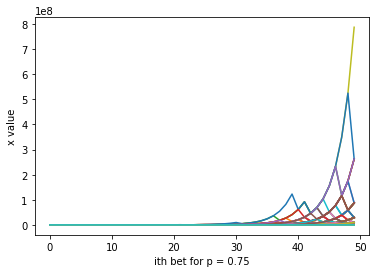

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import random

def classic_kelly(p):
    plt.figure(p)
    ending_vals = []
    for _ in range(1000):
        x = 100
        x_list = []
        for i in range(50):
            bet_size = 2*p - 1
            r = random.random() #r is a random value between 0 and 1
            if r < p:
                x *= 1 + bet_size
            else:
                x *= 1 - bet_size
            x_list.append(x)
        plt.plot(np.arange(len(x_list)), x_list)
        plt.xlabel('ith bet for p = ' + str(p))
        plt.ylabel('x value')
        ending_vals.append(x)
    print()
    print("X starts at 100. Median ending value when win probability is", p, ":  ", np.median(ending_vals))
    print("mean: ", np.mean(ending_vals))
    count = 0
    for v in ending_vals:
        if v < 50:
            count += 1
    print("'risk of ruin', or probability that we end up with < 50: ", count/1000)

for p in [0.51, 0.55, 0.60, 0.75]:
    classic_kelly(p)

In [ ]:
def compare_kelly(p = 2/3, obs): #obs: other bet size
    kbs = 2*p - 1 #kbs: kelly bet size
    plt.figure(obs)
    ending_vals = []
    for _ in range(1000):
        x = 100
        x_list = []
        for i in range(50):
            r = random.random() #r is a random value between 0 and 1
            if r < p:
                x *= 1 + kbs
            else:
                x *= 1 - kbs
            x_list.append(x)
        plt.plot(np.arange(len(x_list)), x_list)
        plt.xlabel('ith bet for bet size' + str(obs))
        plt.ylabel('x value')
        ending_vals.append(x)
    print()
    print("X starts at 100. Median ending value when win probability is", p, ":  ", np.median(ending_vals))
    print("mean: ", np.mean(ending_vals))
    count = 0
    for v in ending_vals:
        if v < 50:
            count += 1
    print("'risk of ruin', or probability that we end up with < 50: ", count/1000)

for p in [0.51, 0.55, 0.60, 0.75]:
    classic_kelly(p)


X starts at 100. Median ending value when  10 %  is bet each time:  250.60884848529332
'risk of ruin', or probability that we end up with < 50:  0.0

X starts at 100. Median ending value when  25 %  is bet each time:  775.9868953016073
'risk of ruin', or probability that we end up with < 50:  0.002

X starts at 100. Median ending value when  50 %  is bet each time:  2081.2716157160457
'risk of ruin', or probability that we end up with < 50:  0.016

X starts at 100. Median ending value when  75 %  is bet each time:  3190.2097168089017
'risk of ruin', or probability that we end up with < 50:  0.053

X starts at 100. Median ending value when  99 %  is bet each time:  990.8130564747707
'risk of ruin', or probability that we end up with < 50:  0.236


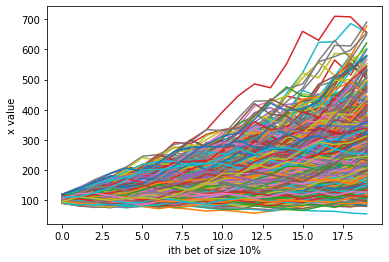

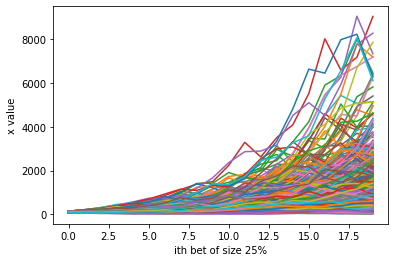

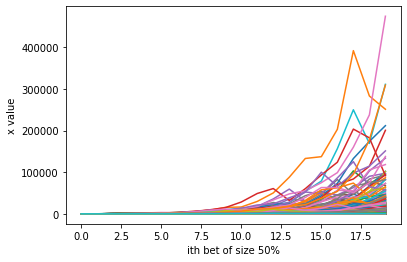

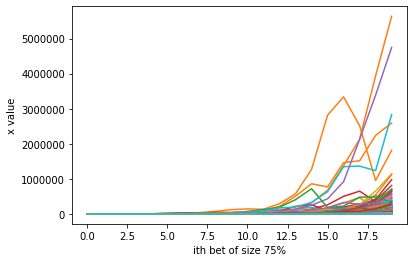

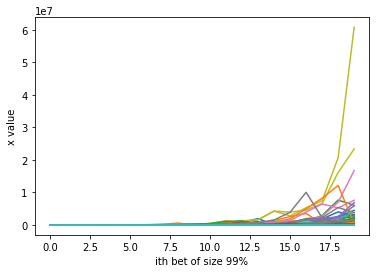

In [40]:
def uniform(percentage):
    ending_vals = []
    plt.figure(percentage)
    for _ in range(1000):
        x = 100
        x_list = []
        for i in range(20):
            bet = x*percentage/100
            r = 3*random.random() - 1 #r is a random value between -1 and 2
            x = x + r*bet #these two lines can be simplified but this is clearer
            x_list.append(x)
        plt.plot(np.arange(len(x_list)), x_list)
        plt.xlabel('ith bet of size ' + str(percentage) + '%')
        plt.ylabel('x value')
        ending_vals.append(x_list[len(x_list) - 1])
    print()
    print("X starts at 100. Median ending value when ", percentage, "%  is bet each time: ", np.median(ending_vals))
    count = 0
    for v in ending_vals:
        if v < 50:
            count += 1
    print("'risk of ruin', or probability that we end up with < 50: ", count/1000)

for p in [10, 25, 50, 75, 99]:
    uniform(p)